In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src import config
from src.retinex import MSRCR

%matplotlib inline
PATH = "input"

C:\Users\Vishal\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import glob
from PIL import Image


In [3]:

def plot_hist(orig_img, enh_img, hist=False, save=False, fname=None):
    '''
    A function to display original and enhanced images.


    Args:

    origin_img : input image
    enh_img : MSRCR output  
    save : FALSE(default); Set it to TRUE to save the output to assets.
    '''
    if hist :
        fig, ax = plt.subplots(2,2, figsize=(20,15))

        ax[0,0].imshow(orig_img)
        ax[0,0].set_xticks([])
        ax[0,0].set_yticks([])
        ax[0,0].set_title('Original',fontsize=25)
        ax[1,0].hist(orig_img.ravel(),256,[0,256])

        ax[0,1].imshow(enh_img)
        ax[0,1].set_xticks([])
        ax[0,1].set_yticks([])
        ax[0,1].set_title('Enhanced',fontsize=25)
        ax[1,1].hist(enh_img.ravel(),256,[0,256])

        fig.suptitle('Multi-scale retinex  with color restoration', fontsize=30, y=1.05)
        fig.tight_layout()

    else :
        fig, ax = plt.subplots(1,2, figsize=(15,8))

        ax[0].imshow(orig_img)
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_title('Original',fontsize=25)
        ax[1].imshow(enh_img)
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        ax[1].set_title('Enhanced',fontsize=25)

        fig.suptitle('Multi-scale retinex  with color restoration', fontsize=30, y=1.05)
        fig.tight_layout()

    
    if save:
        if fname is not None:
            save_file = os.path.join('assets', fname) 
            plt.savefig(save_file,bbox_inches='tight',dpi=72)
            plt.close(fig)

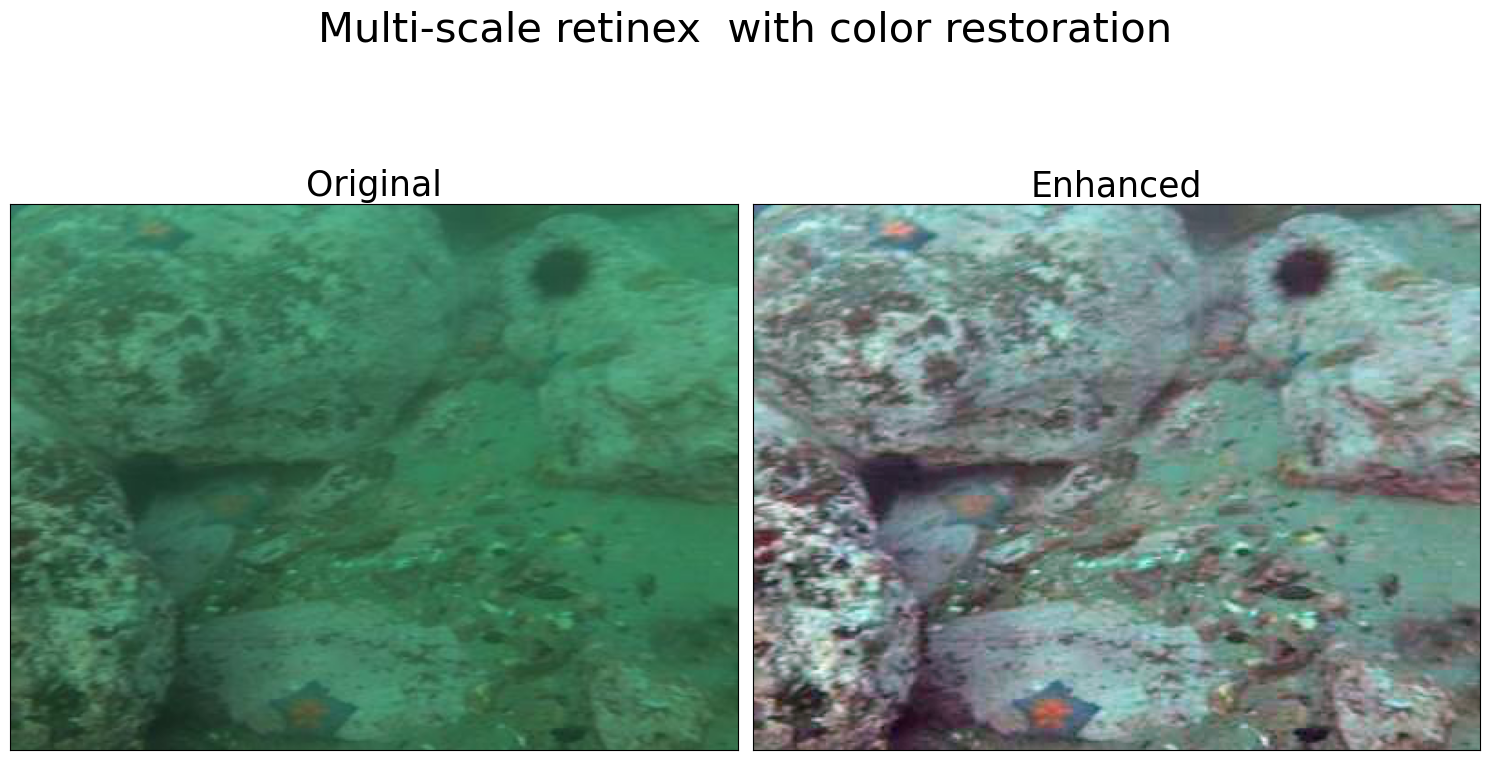

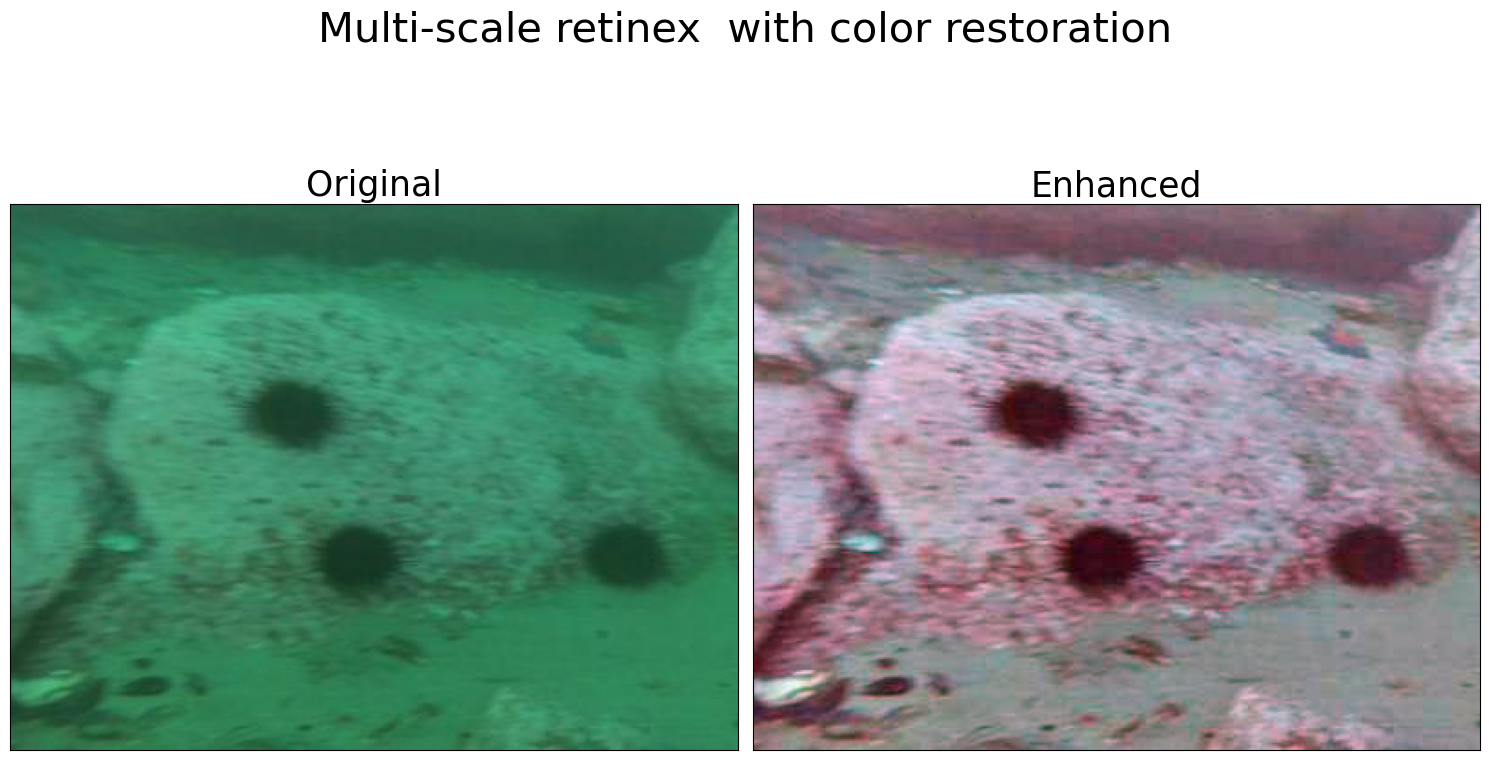

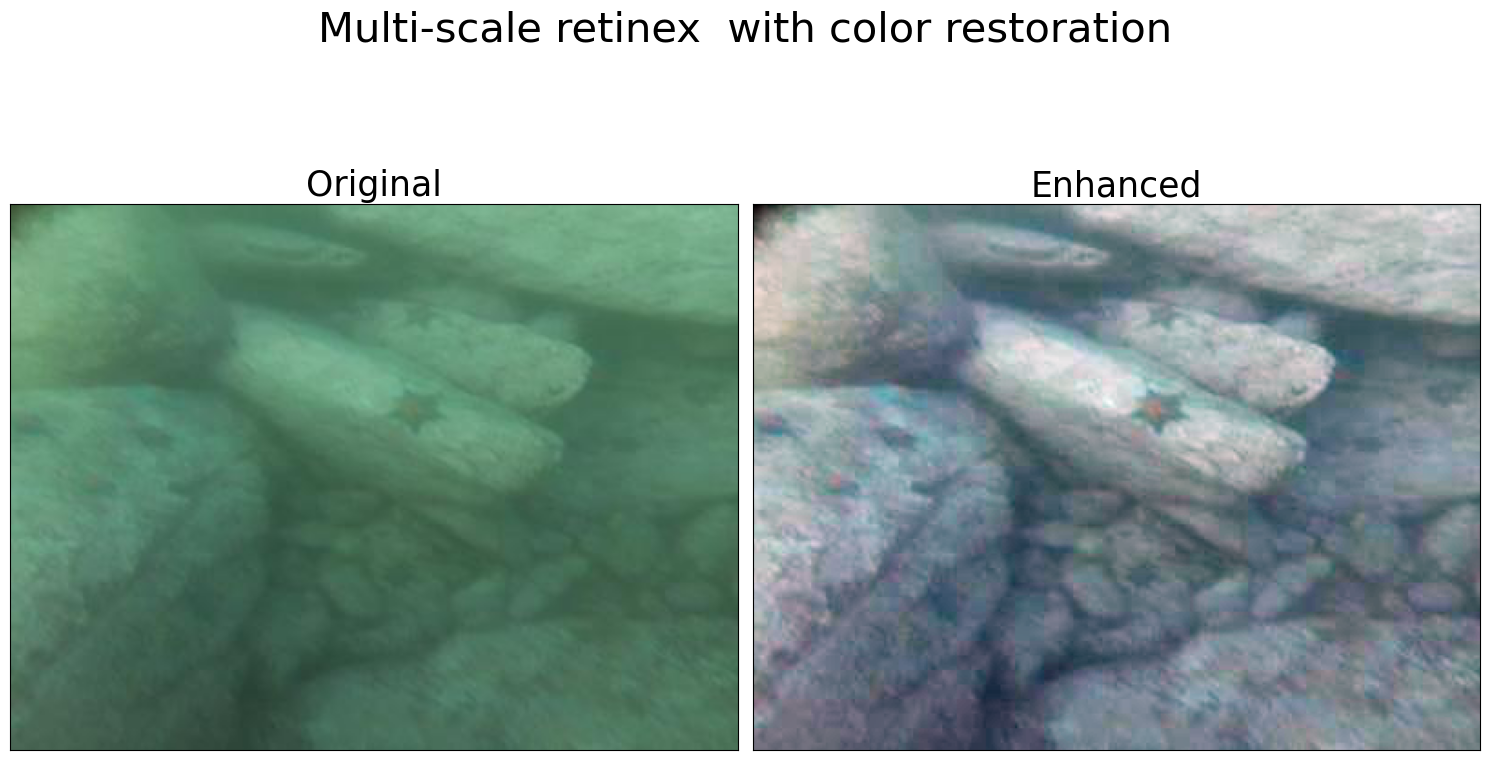

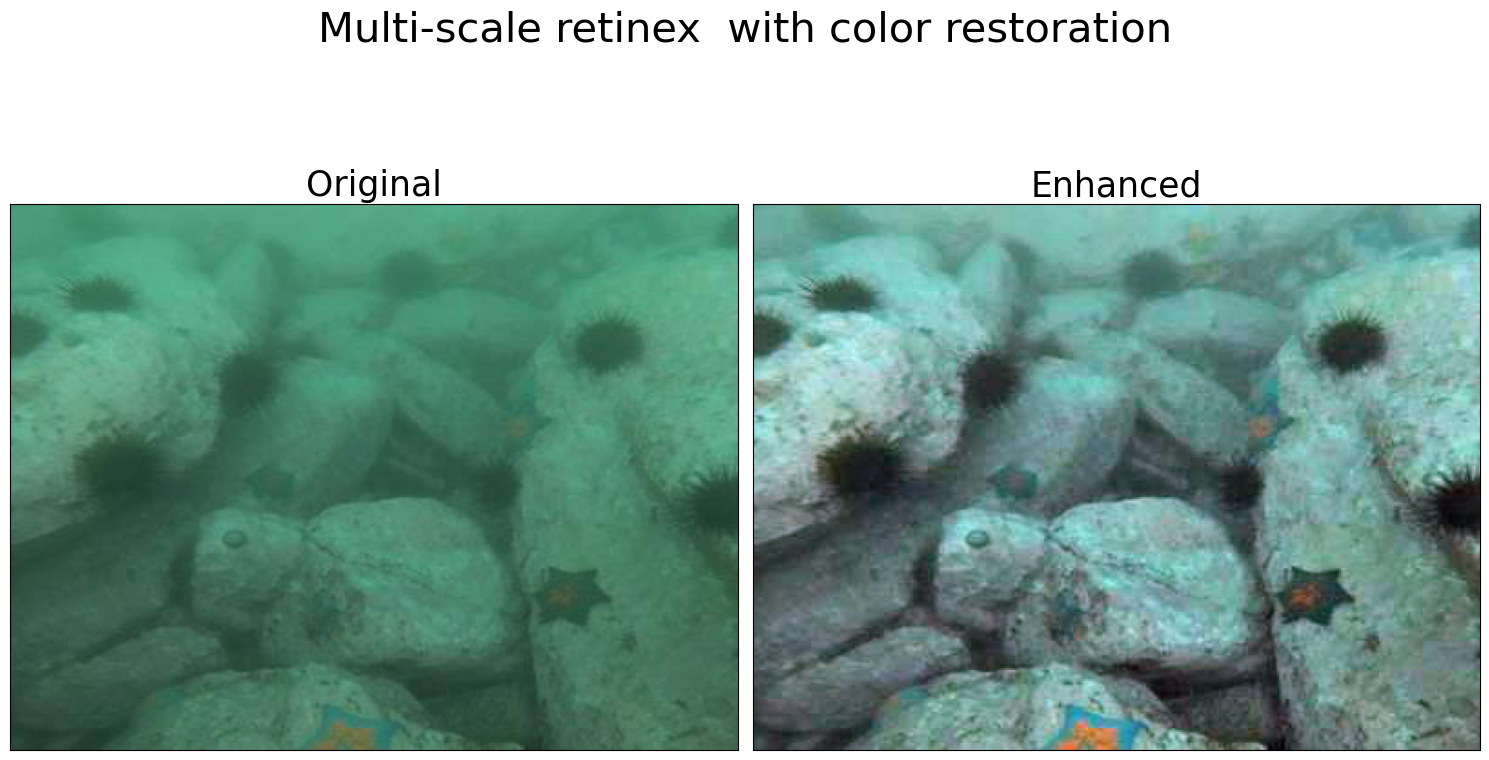

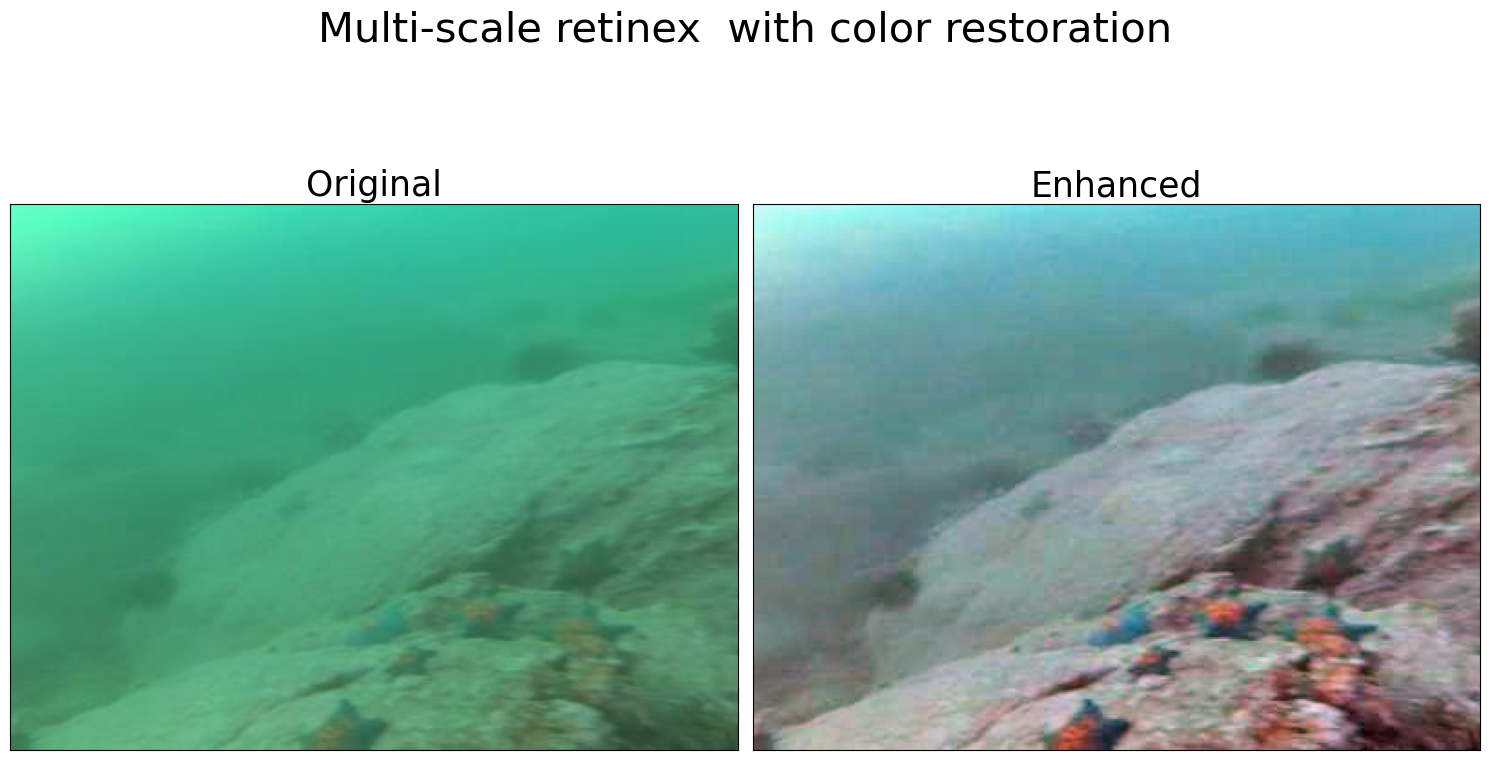

In [4]:
images = glob.glob("input/*.jpg")
x = 1
count = 1
for image in images:
    with open(image,"rb") as file:
        img = Image.open(file)      
        msrcr_img = MSRCR(img,config.SIGMA_LIST,config.ALPHA,config.BETA,config.G,config.OFFSET) 
        
#         Image.fromarray(msrcr_img).save("assets/output_{a}.jpg".format(a=count))
#         count += 1
        
#         msrcr_img.save()
                          
        plot_hist(img , msrcr_img, hist=False)